# What is data?

John Fox

Data is a record of the results of observations. Therefore, data describes the observation/s in numerical form. To perform statistic numerical representations of one's observations are necessary. Observations are represented by measurements and the frequency of the measurement (i.e. Frequency is a number that describes how many times you got the same measurement value.). The most fundamental statistics are the measurements and their respective frequencies. For example, a statistics teacher has 25 students. Each student tosses four coins and records the number of heads. The results are

\begin{equation*}
x = \begin{bmatrix}
2\;\; 2\;\; 0\;\; 1\;\; 1\;\; 1\;\; 2\;\; 3\;\; 1\;\; 2\;\; 2\;\; 3\;\; 3\;\; 4\;\; 1\;\; 3\;\; 2\;\; 3\;\; 3\;\; 1\;\; 2\;\; 2\;\; 1\;\; 2\;\; 2 
\end{bmatrix}
\end{equation*}

This data set can be better understood by sorting the values. For large datasets a programming language will be helpful. Here I will use Python.

In [15]:
# import necessary classes
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# make an array
x = np.array([2, 2, 0, 1, 1, 1, 2, 3, 1, 2, 2, 3, 3, 4,
              1, 3, 2, 3, 3, 1, 2, 2, 1, 2, 2])
# print the array as output
print 'x =', x
# print whitespace
print '\nsorted: \n'
# sort the array
x = np.sort(x, axis=None)
# print the sorted array
print 'x =', x

x = [2 2 0 1 1 1 2 3 1 2 2 3 3 4 1 3 2 3 3 1 2 2 1 2 2]

sorted: 

x = [0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 4]


Examine the list of results, x. While unsorted, this list of values is difficult to understand. However, when the values are sorted it is clear that there are only 5 measures or values of concern. To be concise we can reduce this list down to the following:

\begin{equation*}
x = \begin{bmatrix} 
0\;\; 1\;\; 2\;\; 3\;\; 4
\end{bmatrix}
\end{equation*}

Clearly this reduced list is much easier to cognitvely digest. By itself it is incomplete. The list in its current state does not reveal how often each measure occurred. Hence we are missing information when looking at this reduced list. If we include the freqency of each value then we have all the information necessary to recreate the original list. A complete, reduced list looks like this:

\begin{equation*}
x = \begin{bmatrix} 
0\;\; 1\;\; 2\;\; 3\;\; 4 \\ 
1\;\; 7\;\; 10\;\; 6\;\; 1 
\end{bmatrix}
\end{equation*}

Now we all the information of the original list in reduced form. This reduced list shows the frequency distribution of values. 

Frequency Distribution of x = 
[[  0.   1.   2.   3.   4.]
 [  1.   7.  10.   6.   1.]]


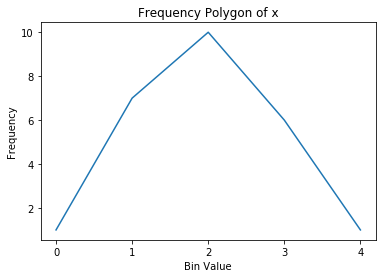

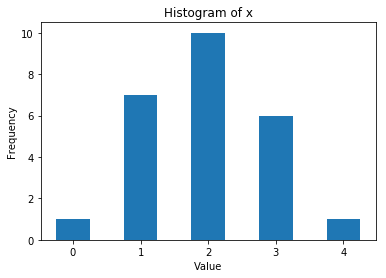

In [72]:
# lets reduce the list and detemine the frequency of each value
bins = 5                             # number of bins to sort data into
maxval = np.amax(x, axis=0)          # maximum value
minval = np.amin(x, axis=0);         # minimum value
l = len(x)                           # length of list, x
nx = x - np.matlib.repmat(minval,1,l)# subtract the minimum value
width = maxval - minval              # range of the data
binwidth = width/(bins-1)            # determine the width of the bins 

H = (2,5)
H = np.zeros(H)                      # allocate space for distribution

# for loop to bin the data
for i in range(len(x)):
    binval = int(x[i]/binwidth)      # compute the appropriate bin
    H[:,binval] = [x[i]+minval, H[1,binval] + 1] # does the binning

# print H as output
print 'Frequency Distribution of x = \n', H

# plot the freqency polygon of x
plt.figure('FreqPolygon')
locs, labels = plt.xticks()
plt.xticks(np.arange(minval,maxval+1,1))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Polygon of x')
plt.plot(H[0,:],H[1,:]);

# plot the histogram; this is cool because numpy and matplotlib have some cool built-in capabilities
plt.figure('Histogram')
#locs, labels = plt.xticks()
#plt.xticks(np.arange(minval,maxval,1))
plt.hist(x,bins=np.arange(minval,maxval+2,1),rwidth=0.5,align='left')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x');

Compare the two plots above. The first plot is called a frequency polygon. It is a line plot where each point represents the frequency of the corresponding value on the x-axis. The second plot is a histogram. The histogram is a bar chart where each bar represents a value or interval of values in the data set. The height of the bar represents the frequency of occurrence of its respective value or interval of values. The two plots above represent the same dataset. Notice in both that the most frequently occuring value is 2. In other words, as students flipped four coins and counted the number of heads, the event that 2 out of the four coins turned up heads occurred most often or 10 times. 

# Shapes of Distributions

Distributions have many shapes. Hence, there are many different distributions, and some are well understood. Let's look at some of the distributions that exhibit symmetry.